In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [3]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [4]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [5]:
A

array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5])

In [6]:
left_side

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [7]:
right_side

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [8]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [9]:
def y_star(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))

In [10]:
for i in range(n):
    right_side[i] = y_star(t[i])
    

In [11]:
right_side
    

array([ 0.00000000e+00,  1.51080825e-04,  3.02030751e-04,  4.52718957e-04,
        6.03014775e-04,  7.52787767e-04,  9.01907804e-04,  1.05024514e-03,
        1.19767049e-03,  1.34405511e-03,  1.48927088e-03,  1.63319034e-03,
        1.77568684e-03,  1.91663455e-03,  2.05590858e-03,  2.19338504e-03,
        2.32894110e-03,  2.46245511e-03,  2.59380664e-03,  2.72287657e-03,
        2.84954720e-03,  2.97370225e-03,  3.09522703e-03,  3.21400843e-03,
        3.32993509e-03,  3.44289739e-03,  3.55278760e-03,  3.65949990e-03,
        3.76293052e-03,  3.86297776e-03,  3.95954209e-03,  4.05252628e-03,
        4.14183537e-03,  4.22737687e-03,  4.30906076e-03,  4.38679960e-03,
        4.46050859e-03,  4.53010570e-03,  4.59551167e-03,  4.65665019e-03,
        4.71344790e-03,  4.76583450e-03,  4.81374284e-03,  4.85710900e-03,
        4.89587236e-03,  4.92997570e-03,  4.95936526e-03,  4.98399085e-03,
        5.00380592e-03,  5.01876764e-03,  5.02883700e-03,  5.03397886e-03,
        5.03416208e-03,  

In [12]:
for i in range(n):
#     left_side[i,i] = alpha + h * G_star_ts(t[i],s[0]) * A[0]
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [13]:
for i in range(n):
    left_side[i,i] = alpha + h * G_star_ts(t[i],s[i]) * A[i]

In [14]:
left_side

array([[ 1.00000000e-06, -1.09890873e-19, -1.64836310e-19, ...,
        -1.92309028e-19, -2.74727183e-20, -1.37363591e-20],
       [-5.49454365e-20,  1.29661703e-06,  5.84726357e-07, ...,
         2.74395150e-07,  1.37235315e-07,  3.84618056e-19],
       [ 8.24181548e-20,  5.84726357e-07,  2.15937586e-06, ...,
         5.48639325e-07,  2.74395150e-07,  1.92309028e-19],
       ...,
       [-1.23627232e-19,  2.74395150e-07,  5.48639325e-07, ...,
         2.15937586e-06,  5.84726357e-07,  1.78572669e-19],
       [ 2.47254464e-19,  1.37235315e-07,  2.74395150e-07, ...,
         5.84726357e-07,  1.29661703e-06, -1.31869048e-18],
       [-2.74727183e-20, -2.74727183e-19, -5.49454365e-19, ...,
         2.74727183e-19, -1.31869048e-18,  1.00000000e-06]])

In [15]:
np.linalg.solve(left_side,right_side)

array([-1.14437554e-13,  1.01007981e-02,  2.02005655e-02,  3.02982718e-02,
        4.03928870e-02,  5.04833806e-02,  6.05687236e-02,  7.06478864e-02,
        8.07198414e-02,  9.07835603e-02,  1.00838016e-01,  1.10882184e-01,
        1.20915038e-01,  1.30935555e-01,  1.40942713e-01,  1.50935490e-01,
        1.60912867e-01,  1.70873826e-01,  1.80817352e-01,  1.90742429e-01,
        2.00648046e-01,  2.10533192e-01,  2.20396859e-01,  2.30238042e-01,
        2.40055737e-01,  2.49848942e-01,  2.59616659e-01,  2.69357892e-01,
        2.79071646e-01,  2.88756929e-01,  2.98412752e-01,  3.08038126e-01,
        3.17632064e-01,  3.27193581e-01,  3.36721695e-01,  3.46215421e-01,
        3.55673781e-01,  3.65095795e-01,  3.74480489e-01,  3.83826893e-01,
        3.93134043e-01,  4.02400987e-01,  4.11626789e-01,  4.20810529e-01,
        4.29951315e-01,  4.39048288e-01,  4.48100627e-01,  4.57107555e-01,
        4.66068347e-01,  4.74982327e-01,  4.83848866e-01,  4.92667369e-01,
        5.01437253e-01,  

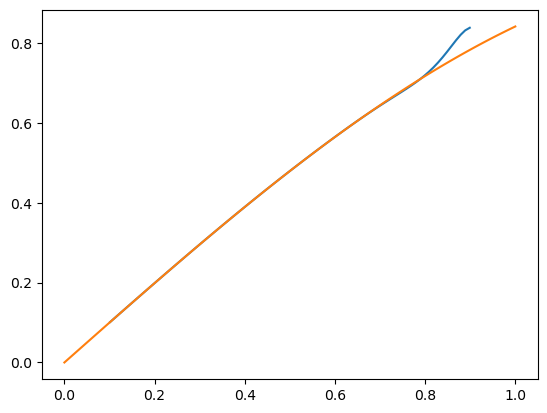

In [16]:
plt.plot(x[10:90],np.linalg.solve(left_side,right_side)[10:90])
plt.plot(x,real_one)

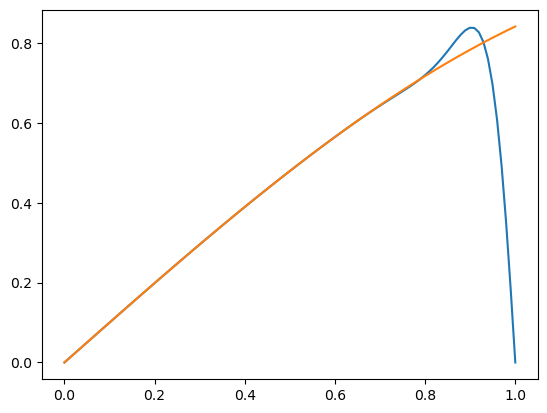

In [17]:
plt.plot(x,np.linalg.solve(left_side,right_side))
plt.plot(x,real_one)

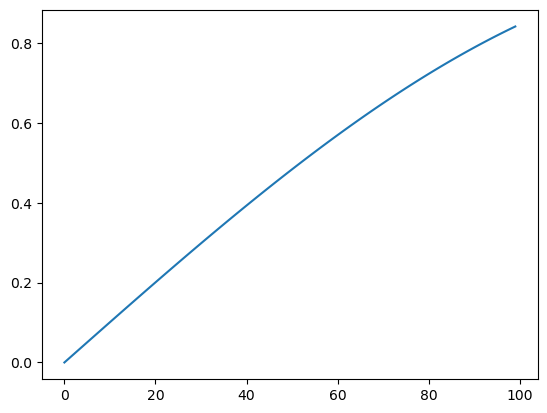

In [18]:
plt.plot(np.sin(x))

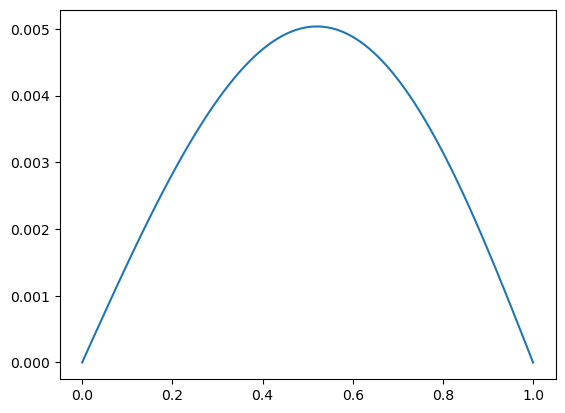

In [19]:
plt.plot(x,right_side)

In [20]:
def f_r(x: float) -> float:
    return np.sin(x)

def phi(s: float) -> float:
    return ((1/2) * (np.exp(s-1) - np.exp(-s +1))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))

def theta(s: float) -> float:
    return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
def y(x: float) -> float:
    sum = 0
    for i in range(1,n-1):
        if x < s[i]:
            sum += phi(s[i]) * (np.exp(x) - np.exp(-x)) * f_r(s[i])
        else:
            sum += theta(s[i]) * (np.exp(x - 1) - np.exp(-x + 1)) * f_r(s[i])
    sum *= 2
    sum += phi(s[0]) * (np.exp(x) - np.exp(-x)) * f_r(s[0]) + theta(s[n - 1]) * (np.exp(x - 1) - np.exp(-x + 1)) * f_r(s[n - 1])
    return (h/2) * sum

def y_star1(t: float) -> float:
    sum = 0
    for i in range(1,n-1):
        if t < x[i]:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
        else:
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        sum *= 2
        sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0]) + theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1])
    return (h/2) * sum

In [21]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [22]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [23]:
for i in range(n):
    right_side[i] = y_star1(t[i])
    

In [24]:
for i in range(n):
#     left_side[i,i] = alpha + h * G_star_ts(t[i],s[0]) * A[0]
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [25]:
for i in range(n):
    left_side[i,i] = alpha + h * G_star_ts(t[i],s[i]) * A[i]

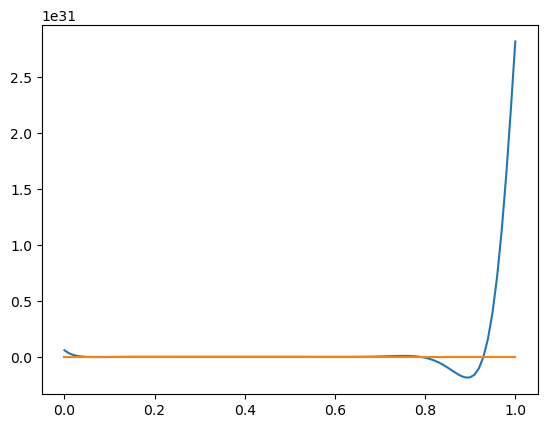

In [27]:
plt.plot(x,np.linalg.solve(left_side,right_side))
plt.plot(x,real_one)

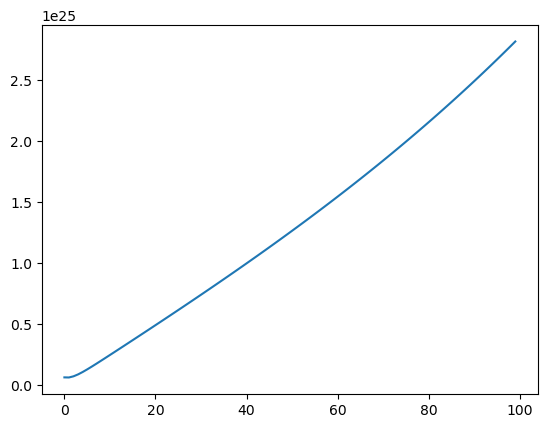

In [29]:
plt.plot(right_side)